In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import random


## Gerar numeros ficticios

In [41]:
metric=[30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125]
value=[180,190,200,210,220,230,240,250,280,300,330,360,400,450,550,690,750,800,850,900]


dic={
    'Metragem':metric,
     'Valor Imovel':value
}

In [43]:
df=pd.DataFrame(data=dic)

In [45]:
df.head()

,Metragem,Valor Imovel
0,30,180
1,35,190
2,40,200
3,45,210
4,50,220


## Grafico para analisar os dados

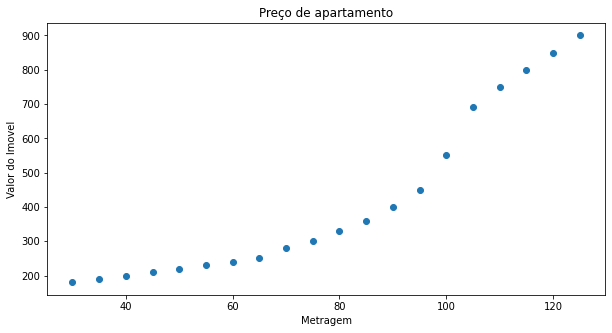

In [47]:
plt.figure( figsize=(10,5))
plt.scatter(df.Metragem,df['Valor Imovel'])

plt.title('Preço de apartamento')
plt.xlabel('Metragem')
plt.ylabel('Valor do Imovel')
plt.show()

## separa dados X e Y e calcular correlaçao das variaveis

In [48]:
X=df.Metragem.values
y=df['Valor Imovel'].values

In [49]:
coef= np.corrcoef(X,y)
coef

array([[1.        , 0.93213399],
       [0.93213399, 1.        ]])

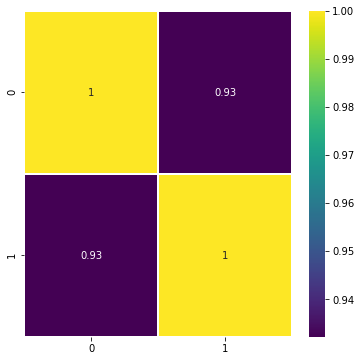

In [50]:
plt.figure( figsize=(6,6))
sns.heatmap(coef, linewidths=.1, cmap='viridis', annot=True)
plt.show()

## Vamos converter os dados para um formato de Matriz


In [51]:
X = X.reshape(-1,1)
y= y.reshape(-1,1)

## escalonar os dados

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scale_x=StandardScaler()
scale_y=StandardScaler()

In [54]:
x = scale_x.fit_transform(X)
y = scale_y.fit_transform(y)

## Treinando modelo

In [55]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV


In [56]:
params=[
        {
            "activation":['identity', 'logistic', 'tanh', 'relu'],
            'solver':['lbfgs', 'sgd', 'adam'],
            'shuffle':[True,False],
            'verbose':[True,False],
        }
]

In [57]:
# model = MLPRegressor(
#     hidden_layer_sizes=(4,4),
#     activation='relu',
#     solver='adam',
#     max_iter=1000,
#     verbose=False
#     )
model = GridSearchCV(
      MLPRegressor(max_iter=2000),
      params,
      scoring='r2',

)

In [58]:
predi=model.fit(x,y)

 = 0.01189410
Iteration 214, loss = 0.01178897
Iteration 215, loss = 0.01168603
Iteration 216, loss = 0.01158422
Iteration 217, loss = 0.01148383
Iteration 218, loss = 0.01138493
Iteration 219, loss = 0.01128792
Iteration 220, loss = 0.01119232
Iteration 221, loss = 0.01109797
Iteration 222, loss = 0.01100496
Iteration 223, loss = 0.01091326
Iteration 224, loss = 0.01082282
Iteration 225, loss = 0.01073361
Iteration 226, loss = 0.01064589
Iteration 227, loss = 0.01056006
Iteration 228, loss = 0.01047551
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.57481072
Iteration 2, loss = 0.55762710
Iteration 3, loss = 0.54073175
Iteration 4, loss = 0.52418745
Iteration 5, loss = 0.50795333
Iteration 6, loss = 0.49199278
Iteration 7, loss = 0.47627663
Iteration 8, loss = 0.46085059
Iteration 9, loss = 0.44570440
Iteration 10, loss = 0.43084233
Iteration 11, loss = 0.41631149
Iteration 12, loss = 0.40210386
Iteration 13, loss = 0.388

In [59]:
print(predi.score(x,y))
print(model.best_params_)

0.9848603089943012
{'activation': 'relu', 'shuffle': False, 'solver': 'adam', 'verbose': False}


## plotar a reta do modelo

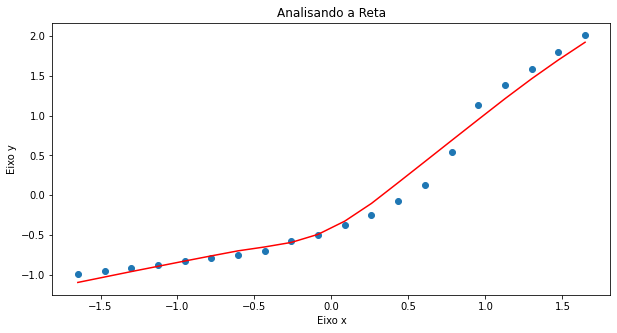

In [60]:
plt.figure( figsize=(10,5))

plt.scatter(x,y)
plt.plot(
    x ,
    predi.predict(x),
    color='red'
    )

plt.title('Analisando a Reta')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.show()

## prevendo valores por metragem

In [61]:
meter=[[50]]

scale_input = scale_y.transform(meter)
scale_input

predi= model.predict(scale_input)

result = scale_y.inverse_transform(predi)
result[0]



print('Um apartamento de: ', meter[0][0], ' metros')
print('Custaria: R$: ',result[0])

Um apartamento de:  50  metros
Custaria: R$:  165.94398654388746


In [62]:
model.score(x,y)

0.9848603089943012